In [ ]:
##Importing Training Data

In [13]:
import os
import numpy as np
import cv2
import pandas as pd
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

x = []
y = []
x_gray = []
basepath = "GTSRB/Final_Training/Images"
for folders in sorted(listdir_nohidden(basepath)):
    path1 = basepath + '/' + folders
    for face in sorted(listdir_nohidden(path1))[:-1]:
        path2 = path1 + '/' + face
        image = cv2.imread(path2)
        image = cv2.resize(image, (40, 40))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        x_gray.append(gray)
        x.append(np.array(image))
        y.append(int(folders)) 
x2 = np.array(x)
y = np.array(y)
x_gray = np.array(x_gray)
print(x2.shape)
print(y.shape)
print(x_gray.shape)

(39209, 40, 40, 3)
(39209,)
(39209, 40, 40)


In [ ]:
## Loading Test Data

In [31]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

x_test = []
x_test_gray = []
basepath = "GTSRB_Test/Final_Test/Images"
for folders in sorted(listdir_nohidden(basepath))[:-1]:
    path1 = basepath + '/' + folders
    image = cv2.imread(path1)
    image = cv2.resize(image, (40, 40))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    x_test_gray.append(gray)
    x_test.append(np.array(image))
x_test = np.array(x_test)
x_test_gray = np.array(x_test_gray)
print(x_test.shape)
df = pd.read_csv("evaluation/GTSRB_Test_GT.csv",delimiter = ";")
labels = np.array(df["ClassId"])

(12630, 40, 40, 3)


In [2]:
##Our CNN Model

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten,Dropout,ActivityRegularization,BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import regularizers
from sklearn.model_selection import GridSearchCV
def create_model(shape =(40,40,1),optimizer='adam'):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=shape))
    model.add(AveragePooling2D())

    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(AveragePooling2D())
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(AveragePooling2D())

    model.add(Flatten())
    model.add(Dense(units=240, activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(BatchNormalization())
    model.add(Dense(units=120, activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.14))
    model.add(Dense(units=84, activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=43, activation = 'softmax'))

    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
##Evaluate Function

In [32]:
# Helper Function for evaluation [Reference - Elec3612 Assignment]
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

def evaluate(y_test, y_predict, model):
    print("\nMODEL: " + str(model))
    print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))
    print("Precision: ", metrics.precision_score(y_test, y_predict, average='micro'))
    print("Recall: ", metrics.recall_score(y_test, y_predict, average='micro'))
    print("F1 Score: ", metrics.f1_score(y_test, y_predict, average='micro'))
    print("Classification Report: \n", metrics.classification_report(y_test, y_predict))
    
    # Plotting ROC: https://www.statology.org/plot-roc-curve-python/
    labels = np.unique(y_test)
    
    for label in labels:
        y_test_curr = []
        for el in y_test:
            if el == label:
                y_test_curr.append(1)
            else:
                y_test_curr.append(0)
                
        y_predict_curr = []
        for el in y_predict:
            if el == label:
                y_predict_curr.append(1)
            else:
                y_predict_curr.append(0)

        fpr, tpr, _ = metrics.roc_curve(y_test_curr,  y_predict_curr)
        auc = metrics.roc_auc_score(y_test_curr, y_predict_curr)

        # Plot ROC for this label
        plt.plot(fpr,tpr,label="AUC " + str(label) + " = "+ "{:.2f}".format(auc))
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [ ]:
##Running our model with coloured data

Epoch 1/25
613/613 [==============================] - 34s 54ms/step - loss: 3.4564 - accuracy: 0.6055
Epoch 2/25
613/613 [==============================] - 31s 51ms/step - loss: 0.8572 - accuracy: 0.9294
Epoch 3/25
613/613 [==============================] - 33s 53ms/step - loss: 0.4922 - accuracy: 0.9536
Epoch 4/25
613/613 [==============================] - 34s 56ms/step - loss: 0.3821 - accuracy: 0.9614
Epoch 5/25
613/613 [==============================] - 33s 54ms/step - loss: 0.3152 - accuracy: 0.9690
Epoch 6/25
613/613 [==============================] - 32s 52ms/step - loss: 0.2790 - accuracy: 0.9727
Epoch 7/25
613/613 [==============================] - 32s 52ms/step - loss: 0.2723 - accuracy: 0.9725
Epoch 8/25
613/613 [==============================] - 32s 52ms/step - loss: 0.2583 - accuracy: 0.9757
Epoch 9/25
613/613 [==============================] - 32s 52ms/step - loss: 0.2276 - accuracy: 0.9797
Epoch 10/25
613/613 [==============================] - 32s 52ms/step - loss: 0.220

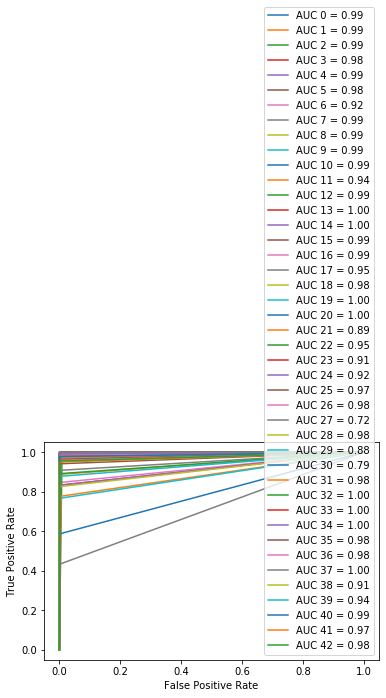

CPU times: user 45min 8s, sys: 20min 5s, total: 1h 5min 13s
Wall time: 13min 19s


In [33]:
%%time
# Train the model for 25 epochs with batch size 64
batch_size = 64
epochs = 25
model_coloured = create_model((40,40,3))
history = model_coloured.fit(x2, y, batch_size=batch_size,
                    epochs=epochs)
pred = model_coloured.predict(x_test)
prediction_label = np.argmax(pred,axis=1)
evaluate(labels,prediction_label,"CNN_Coloured")

In [29]:
##Running our model with grayscale data

Epoch 1/25
613/613 [==============================] - 30s 47ms/step - loss: 3.4856 - accuracy: 0.5999
Epoch 2/25
613/613 [==============================] - 28s 46ms/step - loss: 0.7336 - accuracy: 0.9453
Epoch 3/25
613/613 [==============================] - 29s 47ms/step - loss: 0.4093 - accuracy: 0.9614
Epoch 4/25
613/613 [==============================] - 29s 47ms/step - loss: 0.3079 - accuracy: 0.9705
Epoch 5/25
613/613 [==============================] - 30s 49ms/step - loss: 0.2619 - accuracy: 0.9752
Epoch 6/25
613/613 [==============================] - 34s 55ms/step - loss: 0.2609 - accuracy: 0.9737
Epoch 7/25
613/613 [==============================] - 31s 51ms/step - loss: 0.2355 - accuracy: 0.9775
Epoch 8/25
613/613 [==============================] - 33s 54ms/step - loss: 0.2291 - accuracy: 0.9781
Epoch 9/25
613/613 [==============================] - 36s 59ms/step - loss: 0.2183 - accuracy: 0.9799
Epoch 10/25
613/613 [==============================] - 38s 63ms/step - loss: 0.209

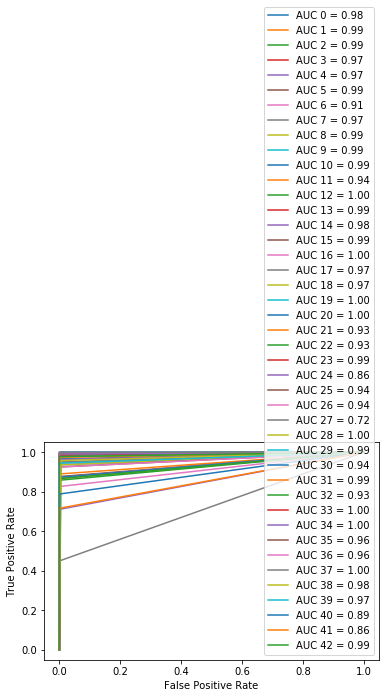

CPU times: user 42min 41s, sys: 19min 51s, total: 1h 2min 32s
Wall time: 13min 36s


In [34]:
%%time
# Train the model for 25 epochs with batch size 64
batch_size = 64
epochs = 25
model = create_model((40,40,1))
history = model.fit(x_gray, y, batch_size=batch_size,
                    epochs=epochs)
pred = model.predict(x_test_gray)
prediction_label = np.argmax(pred,axis=1)
evaluate(labels,prediction_label,"CNN_GrayScale")

In [5]:
##Tuning our Model

In [49]:
%%time
# create the sklearn model for the network
model_CV = KerasClassifier(build_fn=create_model((40,40,3)), verbose=1)
batches = [64,128, 512]
epochs = [50]

gridsearch_cnn = GridSearchCV(estimator=model_CV,
             param_grid={'epoch': [5,10,15],'batch_size' : [32,64,128]},
             verbose=1, cv=5, n_jobs=-1)

gridsearch_cnn.fit(x2, y)

CPU times: user 155 ms, sys: 7.1 ms, total: 162 ms
Wall time: 162 ms


In [9]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Best Accuracy for 0.3095 using {'batch_size': 128, 'epochs': 50}


In [83]:
## Best Parameters - GrayScale

In [60]:
%%time
# Train the model for 50 epochs with batch size 128
batch_size = 64
epochs = 50
model = create_model()
history = model.fit(x_gray, y, batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test_gray, labels))

Epoch 1/50
613/613 [==============================] - 37s 56ms/step - loss: 3.4372 - accuracy: 0.6175 - val_loss: 1.8649 - val_accuracy: 0.8277
Epoch 2/50
613/613 [==============================] - 33s 53ms/step - loss: 0.7875 - accuracy: 0.9393 - val_loss: 0.9574 - val_accuracy: 0.8384
Epoch 3/50
613/613 [==============================] - 32s 52ms/step - loss: 0.4491 - accuracy: 0.9563 - val_loss: 0.5425 - val_accuracy: 0.9107
Epoch 4/50
613/613 [==============================] - 32s 53ms/step - loss: 0.3319 - accuracy: 0.9656 - val_loss: 0.5710 - val_accuracy: 0.9080
Epoch 5/50
613/613 [==============================] - 37s 60ms/step - loss: 0.2913 - accuracy: 0.9711 - val_loss: 0.4754 - val_accuracy: 0.9253
Epoch 6/50
613/613 [==============================] - 34s 55ms/step - loss: 0.2678 - accuracy: 0.9731 - val_loss: 0.4696 - val_accuracy: 0.9258
Epoch 7/50
613/613 [==============================] - 31s 51ms/step - loss: 0.2509 - accuracy: 0.9740 - val_loss: 0.5861 - val_accuracy:

In [61]:
#Getting our Predictions

In [62]:
pred = model.predict(x_test_gray)
prediction_label = np.argmax(pred,axis=1)

395/395 [==============================] - 3s 7ms/step



MODEL: CNN_BestParams_Gray
Accuracy:  0.9528107680126683
Precision:  0.9528107680126683
Recall:  0.9528107680126683
F1 Score:  0.9528107680126683
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.98      0.99      0.99       720
           2       0.96      0.97      0.97       750
           3       0.87      0.95      0.91       450
           4       0.99      0.95      0.97       660
           5       0.90      0.97      0.93       630
           6       0.99      0.79      0.88       150
           7       1.00      0.93      0.96       450
           8       0.99      0.92      0.95       450
           9       0.96      0.99      0.98       480
          10       0.99      1.00      0.99       660
          11       0.94      0.95      0.95       420
          12       0.99      0.95      0.97       690
          13       0.99      0.99      0.99       720
          14     

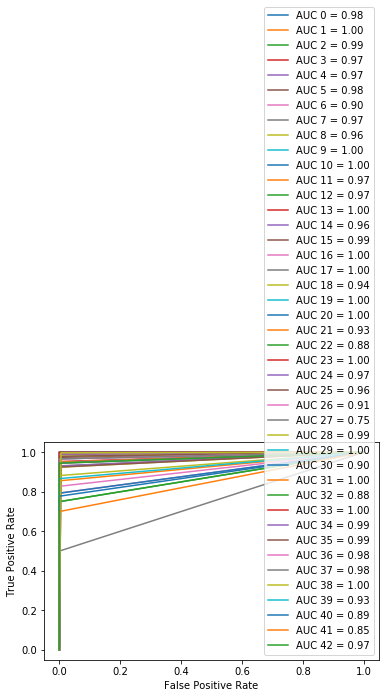

In [63]:
evaluate(labels,prediction_label,"CNN_BestParams_Gray")

In [54]:
##Best Parameters - Colored

In [64]:
%%time
# Train the model for 50 epochs with batch size 128
batch_size = 64
epochs = 50
model = create_model((40,40,3))
history = model.fit(x2, y, batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test, labels))

Epoch 1/50
613/613 [==============================] - 36s 55ms/step - loss: 3.3505 - accuracy: 0.6527 - val_loss: 1.6679 - val_accuracy: 0.8051
Epoch 2/50
613/613 [==============================] - 33s 54ms/step - loss: 0.7984 - accuracy: 0.9364 - val_loss: 0.8140 - val_accuracy: 0.8723
Epoch 3/50
613/613 [==============================] - 33s 54ms/step - loss: 0.4379 - accuracy: 0.9579 - val_loss: 0.5824 - val_accuracy: 0.9105
Epoch 4/50
613/613 [==============================] - 42s 68ms/step - loss: 0.3397 - accuracy: 0.9666 - val_loss: 0.5093 - val_accuracy: 0.9220
Epoch 5/50
613/613 [==============================] - 38s 62ms/step - loss: 0.2878 - accuracy: 0.9723 - val_loss: 0.5088 - val_accuracy: 0.9245
Epoch 6/50
613/613 [==============================] - 42s 69ms/step - loss: 0.2826 - accuracy: 0.9726 - val_loss: 0.4168 - val_accuracy: 0.9477
Epoch 7/50
613/613 [==============================] - 38s 62ms/step - loss: 0.2546 - accuracy: 0.9761 - val_loss: 0.4338 - val_accuracy:

In [65]:
#Getting our Predictions

395/395 [==============================] - 3s 8ms/step

MODEL: CNN_BestParams_Color
Accuracy:  0.9537608867775138
Precision:  0.9537608867775138
Recall:  0.9537608867775138
F1 Score:  0.9537608867775138
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.96      0.98      0.97       720
           2       0.94      0.99      0.97       750
           3       0.95      0.95      0.95       450
           4       1.00      0.98      0.99       660
           5       0.91      0.99      0.95       630
           6       0.98      0.88      0.93       150
           7       1.00      0.95      0.98       450
           8       0.98      0.98      0.98       450
           9       0.93      0.98      0.96       480
          10       0.99      0.99      0.99       660
          11       0.97      0.95      0.96       420
          12       1.00      0.96      0.98       690
          13   

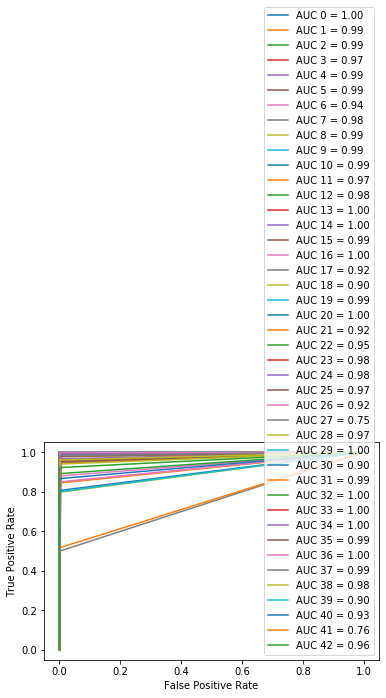

In [66]:
pred = model.predict(x_test)
prediction_label = np.argmax(pred,axis=1)
evaluate(labels,prediction_label,"CNN_BestParams_Color")
model.save("model.h5")